(HW2_2024)=
# HW2

**Deadline:** 03.11.2024 23:59 (GMT+5).

In this task you are suggested to implement gradient descent and Newton's optimization methods, and investigate their performance for three types of functions:

* quadratic function
* loss function of linear regression
* loss function of logistic regression

`BaseSmoothOracle` is an abstract class for objective function $f$ (**oracle**). Each concrete oracle must inherit this class, implementing four methods:

* `func(x)` calculates $f(\boldsymbol x)$
* `grad(x)` calculates $\nabla f(\boldsymbol x)$
* `hess(x)` calculates $\nabla^2 f(\boldsymbol x)$
* `get_opt(x)` calculates point of minimum by direct formula (works only for quadratic and linear regression oracles)

In [3]:
class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """
    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')

    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')

    def get_opt(self):
        """
        Computes the point x at which minimum is attained
        """
        raise NotImplementedError('True solution is unavailable.')

## Quadratic oracle

### Task 2.1 (1 point)

Implement quadratic oracle

```{math}
:label: quadratic-oracle
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T} \boldsymbol x, \quad \boldsymbol A^\mathsf{T}  = \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol b\in\mathbb R^n
```

<!-- Let $\boldsymbol A$ be a symmetric positive definite matrix. Solve the optimization task

$$
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T}\boldsymbol x \to \min\limits_{\boldsymbol x \in \mathbb R^n}
$$

analytically. Namely, -->

Namely,

* find solution $\boldsymbol x_*$ of the equation $\nabla f(\boldsymbol x) = \boldsymbol 0$
* find hessian $\nabla^2 f$ and show that $\nabla^2 f(\boldsymbol x_*)$ is positive definite
* prove that $\boldsymbol x_*$ is the point of global minimum of $f$
* finally, fill the gaps in cell below

### 1) First we should find gradient of f(x) respect to the x:
So we divide our func into two statement and find their gradient using formulas for quadratic and linear term:
$$\nabla \left( \frac{1}{2} x^T A x \right) = \frac{1}{2} \cdot 2 A x = A x$$
$$\nabla (-b^T x) = -b$$ We got $\nabla (f(x)) = 0$ ,so $Ax - b = 0$ -> $Ax = b$, We divide each side to $A^{-1}$ to get only x in one side:
$ x = A^{-1} \cdot b $ So final answer is: $x = A^{-1} \cdot b$
    
### 2) To find hessian we should find secon derviative of func respect to the $x$ and its answer just $A$:
$$\nabla^2 f = A$$
   And the func $\nabla^2 f(x) = A$ is positive definite because $A$ is symmetric and if all eigenvalues of $A$ is positive so it makes the $A$ positive and it means the hessian itself is always positive
### 3) Prove that $x^*$ is the point of global minimum of $f$

Since $f(x) = \frac{1}{2} x^T A x - b^T x$ is a quadratic function with a positive definite Hessian $A$, it is a strictly convex function. For strictly convex functions, any stationary point (where the gradient is zero) is also the global minimum.

Since we found $x^* = A^{-1} b$ by setting $\nabla f(x) = 0$, and $f(x)$ is strictly convex, $x^*$ is the unique point of global minimum of $f(x)$.


In [4]:
import numpy as np

class QuadraticOracle(BaseSmoothOracle):
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        if not np.allclose(A, A.T):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        # YOUR CODE HERE
        f = 0.5 * np.dot(np.dot(x.T, self.A), x) - np.dot(self.b.T, x)
        return f

    def grad(self, x):
        # YOUR CODE HERE
        g = np.dot(self.A, x) - self.b
        return g

    def hess(self, x):
        # YOUR CODE HERE
        return self.A

    def get_opt(self):
        # YOUR CODE HERE
        x = np.dot(np.linalg.inv(self.A), self.b)
        return x

Plot levels of the quadraric oracle in 2-dimensional case using the following function:

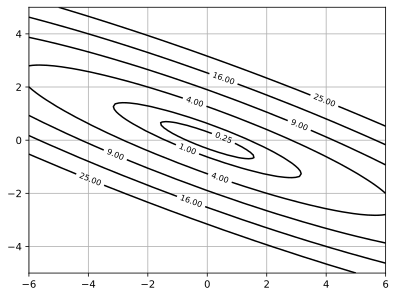

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_levels(func, xrange=None, yrange=None, levels=None):
    """
    Plotting the contour lines of the function.

    Example:
    --------
    >> oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    >> plot_levels(oracle.func)
    """
    if xrange is None:
        xrange = [-6, 6]
    if yrange is None:
        yrange = [-5, 5]
    if levels is None:
        levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    CS = plt.contour(X, Y, Z, levels=levels, colors='k')
    plt.clabel(CS, inline=1, fontsize=8)
    plt.grid()

oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
plot_levels(oracle.func)

## Linear regression oracle

### Task 2.2 (1.5 points)

Implement linear regression oracle

$$
    f(\boldsymbol x) = \frac 1m \Vert \boldsymbol{Ax} - \boldsymbol b\Vert_2^2, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol b \in \mathbb R^n.
$$

Namely,

* find $\nabla f(\boldsymbol x)$
* find $\nabla^2 f(\boldsymbol x)$
* find analytic solution of the minimization problem $f(\boldsymbol x) \to \min\limits_{\boldsymbol x}$
* finally, fill the gaps in the next cell

\

## We have a function:
$ f(x) = \frac{1}{m} \| Ax - b \|_2^2 $, where $ A \in \mathbb{R}^{m \times n} $ and $ b \in \mathbb{R}^m $

### 1. Find $ \nabla f(x) $:
The gradient $ \nabla f(x) $ of $ f(x) = \frac{1}{m} \| Ax - b \|_2^2 $ with respect to $ x $ can be computed as:
$
\nabla f(x) = \frac{2}{m} A^T (Ax - b)
$

### 2. Find $ \nabla^2 f(x) $:
The Hessian $ \nabla^2 f(x) $ of $ f(x) $ with respect to $ x $ is:
$
\nabla^2 f(x) = \frac{2}{m} A^T A
$
This is a constant matrix, as $ f(x) $ is a quadratic function in $ x $.

### 3. Find the Analytic Solution:
To find the minimizer $ x $ that minimizes $ f(x) $, solve the following normal equation derived from setting $ \nabla f(x) = 0 $:
$
A^T A x = A^T b
$
The solution is:
$
x = (A^T A)^{-1} A^T b
$
provided that $ A^T A $ is invertible.

### 4. Implement the Solution:
Fill in the necessary parts of the code or calculations using these expressions.

Let me know if you need help with implementing this in code!


In [6]:
class LinRegOracle(BaseSmoothOracle):
    """
    Oracle for linear regression:
       func(x) = 1/m ||Ax - b||^2.
    """

    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        # YOUR CODE HERE
        m = self.b.shape[0]
        v = np.dot(self.A, x) - self.b
        f = (np.linalg.norm(v) ** 2) / m
        return f

    def grad(self, x):
        # YOUR CODE HERE
        m = self.b.shape[0]
        v = np.dot(self.A, x) - self.b
        f = np.dot(self.A.T, v) * (2 /  m)
        return f

    def hess(self, x):
        # YOUR CODE HERE
        m = self.b.shape[0]
        f = np.dot(self.A.T, self.A) * (2 /  m)
        return f

    def get_opt(self):
        # YOUR CODE HERE
        x = np.dot(np.dot(np.linalg.inv(np.dot(self.A.T, self.A)), self.A.T), self.b)
        return x

64.66666666666667

## Logistic regression oracle

### Task 2.3 (1.5 point)

Implement logistic regression oracle

```{math}
:label: log-reg-oracle
    f(\boldsymbol x) = \frac 1m \sum_{i=1}^m \log\big(1 + \exp(-b_i\boldsymbol a_i^\mathsf{T} \boldsymbol x)\big) + \frac C2\Vert \boldsymbol x\Vert_2^2
```

Namely, denote

$$
    \boldsymbol A = \begin{pmatrix} a_1^\mathsf{T} \\
    a_2^\mathsf{T} \\
    \vdots\\
    a_m^\mathsf{T}
    \end{pmatrix} \in \mathbb R^{m\times n}, \quad
    \boldsymbol b = \begin{pmatrix} b_1 \\
    b_2\\
    \vdots\\
    b_m
    \end{pmatrix}\in \mathbb R^m,
    \quad
    \boldsymbol x = \begin{pmatrix} x_1 \\
    x_2\\
    \vdots\\
    x_n
    \end{pmatrix}\in \mathbb R^n,
$$

and then

* find the gradient $\nabla f(\boldsymbol x)$ and hessian $\nabla^2 f(\boldsymbol x)$ of logistic regression oracle {eq}`log-reg-oracle` in matrix-vector form
* fill the gaps in the cell below

$$
f(x) = \frac{1}{m} \sum_{i=1}^{m} \log(1 + \exp(-b_i a_i^T x)) + \frac{C}{2} \|x\|_2^2
$$

where:
- $ A \in \mathbb{R}^{m \times n}:$ the matrix of feature vectors.
- $ b \in \mathbb{R}^m $: the vector of binary labels (we assume $ b_i \in \{-1, 1\} $ for each $ i $).
- $ x \in \mathbb{R}^n $: the model parameter vector.
- $ C $: the regularization coefficient.

### Step 1: Finding the Gradient of f(x)

To compute the gradient $ \nabla f(x) $, we need to differentiate $ f(x) $ with respect to $ x $.

#### a) Log-Loss Term Gradient

Consider the log-loss term for a single sample i:

$$
\log(1 + \exp(-b_i a_i^T x))
$$

Using the chain rule, the derivative with respect to \( x \) is:

$$
\frac{\partial}{\partial x} \log(1 + \exp(-b_i a_i^T x)) = -\frac{b_i a_i}{1 + \exp(b_i a_i^T x)} \exp(b_i a_i^T x)
$$

This simplifies to:

$$
= -b_i a_i \sigma(-b_i a_i^T x)
$$

where $ \sigma(z) = \frac{1}{1 + \exp(-z)} $ is the sigmoid function. We use the property $ \sigma(z) = \frac{\exp(z)}{1 + \exp(z)} $.

For all samples, this becomes:

$$
\frac{1}{m} \sum_{i=1}^m -b_i a_i \sigma(-b_i a_i^T x)
$$

In matrix form, we can write this as:

$$
-\frac{1}{m} A^T (b \circ \sigma(-b \circ (A x)))
$$

where $ \circ $ denotes element-wise multiplication.

#### b) Regularization Term Gradient

The regularization term is $ \frac{C}{2} \|x\|_2^2 $. Its gradient with respect to x is straightforward:

$$
\nabla \left(\frac{C}{2} \|x\|_2^2\right) = C x
$$

#### c) Combining Terms

Thus, the full gradient of f(x) is:

$$
\nabla f(x) = -\frac{1}{m} A^T (b \circ \sigma(-b \circ (A x))) + C x
$$

### Step 2: Finding the Hessian of f(x)

To compute the Hessian $ \nabla^2 f(x) $, we differentiate $ \nabla f(x) $ with respect to x again.

#### a) Hessian of the Log-Loss Term

The gradient of the log-loss term for a single sample i is:

$$
-\frac{1}{m} b_i a_i \sigma(-b_i a_i^T x)
$$

To compute the Hessian, we take the derivative of this expression with respect to x. The result involves the second derivative of the sigmoid function.

The second derivative of the sigmoid function $ \sigma(z) $ is:

$$
\sigma(z)(1 - \sigma(z))
$$

Thus, for each sample i, the Hessian contribution from the log-loss term is:

$$
\frac{1}{m} b_i^2 a_i a_i^T \sigma(b_i a_i^T x)(1 - \sigma(b_i a_i^T x))
$$

For all samples, we get a diagonal matrix D where:

$$
D_{ii} = \sigma(b_i a_i^T x)(1 - \sigma(b_i a_i^T x))
$$

The full Hessian for the log-loss terms is then:

$$
\frac{1}{m} A^T D A
$$

#### b) Hessian of the Regularization Term

The regularization term is $ \frac{C}{2} \|x\|_2^2 $. Its Hessian is simply $ C I $, where I is the identity matrix.

#### c) Combining Terms

Thus, the full Hessian of f(x) is:

$$
\nabla^2 f(x) = \frac{1}{m} A^T D A + C I
$$

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.special import expit

class LogRegOracle(BaseSmoothOracle):
    """
    Oracle for logistic regression.
    """

    def __init__(self, A, b, regcoef=1):
        self.A = A
        self.b = b
        self.C = regcoef

    def func(self, x):
        # YOUR CODE HERE
        reg_term = (self.C / 2) * np.linalg.norm(x) ** 2
        log_loss_terms = np.log(1 + np.exp(-self.b * np.dot(self.A, x)))
        return np.mean(log_loss_terms) + reg_term


    def grad(self, x):
        # YOUR CODE HERE
        m = self.A.shape[0]
        sigm = expit(-self.b * np.dot(self.A, x))
        reg_term = self.C * x
        log_loss_terms = -np.dot(self.A.T, self.b * sigm) / m
        return log_loss_terms + reg_term

    def hess(self, x):
        # YOUR CODE HERE
        m = self.A.shape[0]
        sigm = expit(-self.b * np.dot(self.A, x))
        D = np.diag(sigm * (1 - sigm))
        reg_term = self.C * np.eye(x.size)
        log_loss_term = np.dot(np.dot(self.A.T, D), self.A) / m
        return log_loss_term + reg_term

    def get_opt(self):
        """
        Since there is no analytic solution for the optimal weights of logistic regression,
        here we have to cheat a bit
        """
        LR = LogisticRegression(fit_intercept=False, C= 1./self.C/self.A.shape[0])
        LR.fit(self.A, (self.b + 1) / 2)
        return LR.coef_[0]


## Gradient descent

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.4 (1 point)

Complete the implementation of gradient descent algorithm.

In [8]:
from datetime import datetime
from collections import defaultdict

def gradient_descent(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).microseconds * 1e-6)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        x_k = x_k - learning_rate * grad_at_x_k
        if i >= max_iter:
          return x_k, 'iterations_exceeded', history
        elif np.any(np.isnan(x_k)) or np.any(np.isinf(x_k)) or np.any(np.isnan(grad_at_x_k)) or np.any(np.isinf(grad_at_x_k)):
            return x_k, 'computational_error', history
        elif (np.linalg.norm(grad_at_x_k)) ** 2 < tolerance * (np.linalg.norm(grad_at_x_0)) ** 2:
          return x_k, 'success', history


Now it's try to test gradient descent algorithm on different tasks. Here is some auxiliary code for visualization.

In [9]:
import colorsys

def get_color_array(size):
    HSV_tuples = [(float(i) / size, 1.0, 1.0) for i in range(size)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return np.array(RGB_tuples)

def plot_2d(history, oracle, x_0, x_opt, scale, title, n_levels=3, xlims=None, ylims=None, bound=None):
    if bound is not None:
        history['x'] = history['x'][:bound]
    hist_x = np.array(history['x']).T
    plt.figure(figsize=(12, 5))
    plt.subplot(121)

    plt.plot(np.linalg.norm(hist_x - x_opt[:, None], axis=0), c='c', linewidth=3)
    plt.plot(history['grad_norm'], c='m', linewidth=2)
    plt.xlim(0, len(history['grad_norm']) - 1)
    plt.ylim(0, 2)
    plt.title(title)
    plt.ylabel('Gradients/residuals norm')
    plt.xlabel('Iteration')
    plt.legend(['Residuals', 'Gradients'])
    plt.grid(ls=":")

    plt.subplot(122)
    if xlims is not None:
        x_range = xlims
    else:
        x_range = [x_opt[0] - scale, x_opt[0] + scale]
    if ylims is not None:
        y_range = ylims
    else:
        y_range = [x_opt[1] - scale, x_opt[1] + scale]
    func_opt = oracle.func(x_opt)
    levels = [func_opt + 0.25 * scale / n_levels * i for i in range(1, 4*n_levels + 1, 4)]
    # sizes = np.minimum(5 * float(hist_x.shape[1]) / (np.arange(1, hist_x.shape[1] + 1)), 20)
    plt.scatter(hist_x[0], hist_x[1], s=8, c=get_color_array(hist_x.shape[1]))
    plt.plot(hist_x[0], hist_x[1], alpha=0.6, ls="--", c='r')
    # plt.plot(hist_x[0], hist_x[1], c='r', linewidth=3)
    plt.scatter(x_opt[0], x_opt[1], marker='s', c='r', edgecolors='k')
    plot_levels(oracle.func, xrange=x_range, yrange=y_range, levels=levels)
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(ls=":")
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    plt.show()

def test_2d(method, oracle, x_0, lr, tol=1e-5, scale=1.0, xlims=None, ylims=None, bound=None):
    x_opt = oracle.get_opt()
    if method == 'gd':
        x_star, msg, history = gradient_descent(
            oracle, x_0, lr, tol, trace=True
        )
    elif method == 'newton':
        x_star, msg, history = newton(
            oracle, x_0, lr, tol, trace=True
        )
    else:
        raise ValueError("Unknown error")
    print(msg, len(history['grad_norm']), "iterations")
    plot_2d(history, oracle, x_0, x_opt, scale, 'lr = {}'.format(lr), xlims=xlims, ylims=ylims, bound=bound)

Take a simple quadratic function

$$
    f(x, y) = 2x^2 + 4xy + 5 y^2
$$

which ovbiously has minimum at $(0, 0)$. Now run gradient descent method with $\eta = 0.01$, starting from point $(-2, -1)$:

success 367 iterations


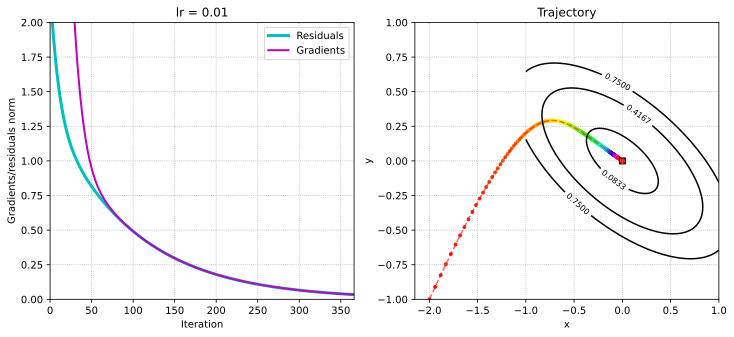

In [11]:
import numpy as np

A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("gd", q_oracle, np.array([-2.0, -1.0]), lr=0.01)

If you did all correctly, gradient descent should converge here to optimal point. But this is not always the case:

* if $\eta$ is very small, convergence could be too slow
* if $\eta$ is very big, than gradient descent often diverges

### Task 2.5 (1 point)

Take previous quadratic oracle and try different learning rates and starting points. Find the smallest and the largest learning rates for which gradient descent is still convergent. Provide some characteristic plots. Also, plot a graph of required iterations versus $\eta$.

### GD for linear regression

Let's try it for simple linear regression. Here is a toy example:

## $x_0$ = 10, $y_0$ = -10, $\eta = 0.01$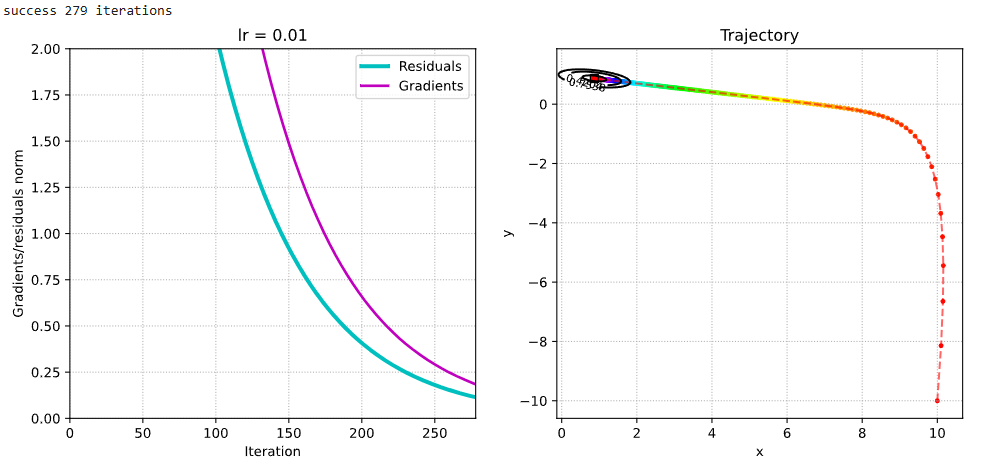

## $x_0$ = 0, $y_0$ = 1, $\eta = 0.01$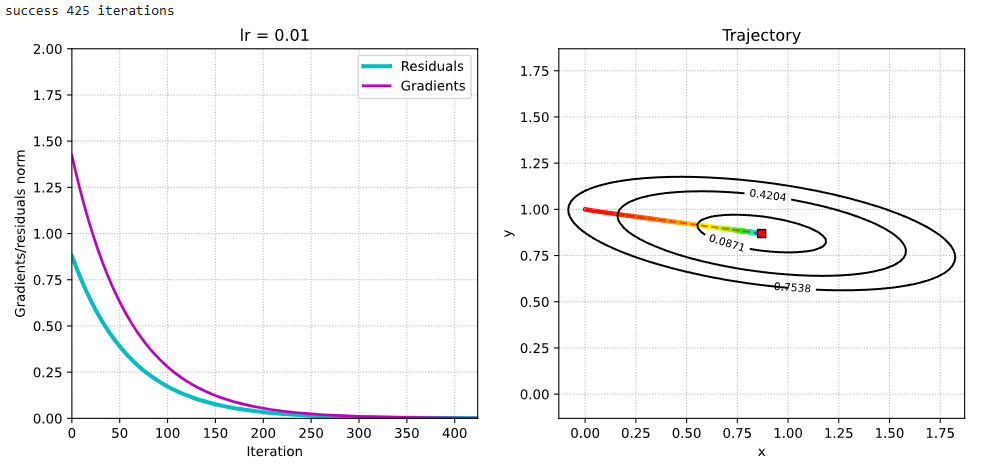

### For learning rates between $ 0.0003 <= \eta <= 0.1 $ gradient descent is still convergent. Below graphs of gradient decent when $ \eta = 0.1, \eta = 0.0003 $.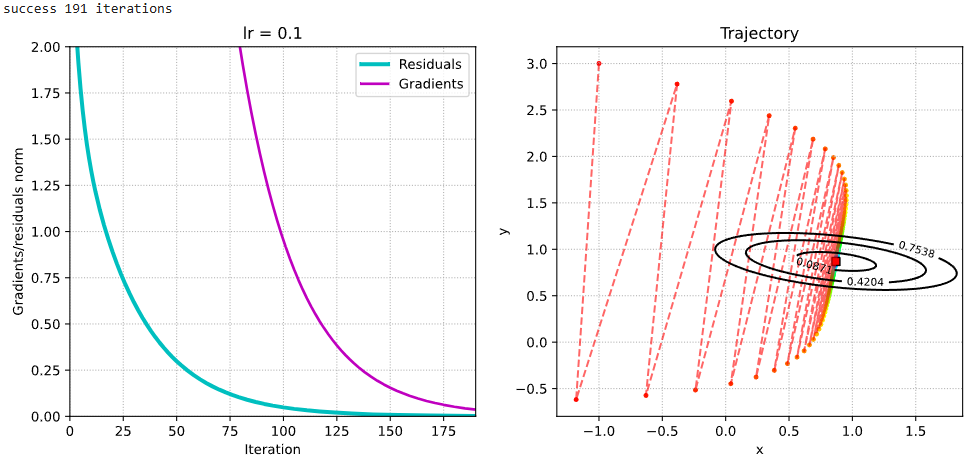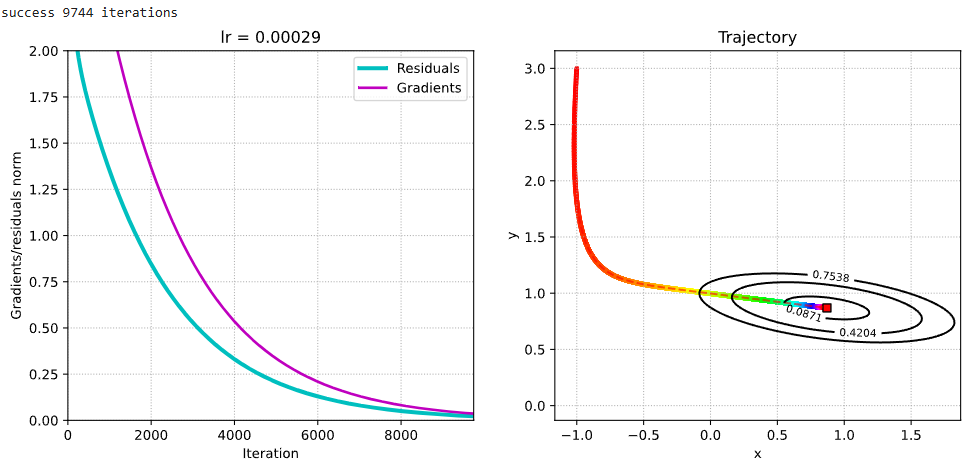

# I copied above dradient_decent() function and changed so it will return only number of iterations

In [12]:
from datetime import datetime
from collections import defaultdict

def gradient_descent2(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).microseconds * 1e-6)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        x_k = x_k - learning_rate * grad_at_x_k
        if i >= max_iter:
          return i
        elif np.any(np.isnan(x_k)) or np.any(np.isinf(x_k)) or np.any(np.isnan(grad_at_x_k)) or np.any(np.isinf(grad_at_x_k)):
            return i
        elif (np.linalg.norm(grad_at_x_k)) ** 2 < tolerance * (np.linalg.norm(grad_at_x_0)) ** 2:
          return i


def plot_iterations(oracle, x_0):
  iterations_needed = []
  learning_rates = np.linspace(0.0003, 0.1, 50)
  for l in learning_rates:
    num_iterations = gradient_descent2(oracle, x_0, l)
    iterations_needed.append(num_iterations)

  plt.figure(figsize=(10, 6))
  plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-', color="b", label="Iterations")
  plt.yscale('log')
  plt.title('Gradient Descent: Iterations Required vs Learning Rate', fontsize=14, fontweight='bold')
  plt.xlabel(r'Learning Rate $\eta$', fontsize=12)
  plt.ylabel('Number of Iterations (log scale)', fontsize=12)
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.legend()
  plt.show()


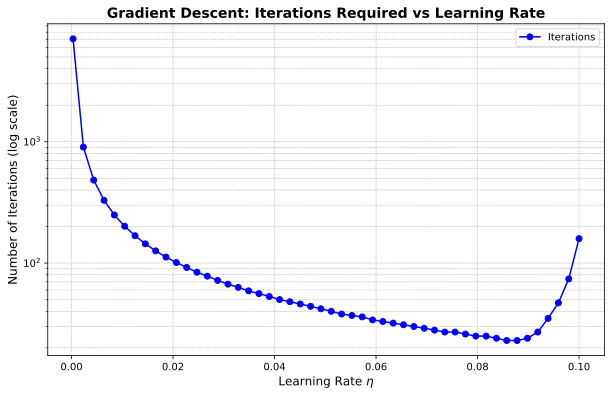

In [13]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
plot_iterations(oracle, np.array([-1, 3.0]))

success 9419 iterations


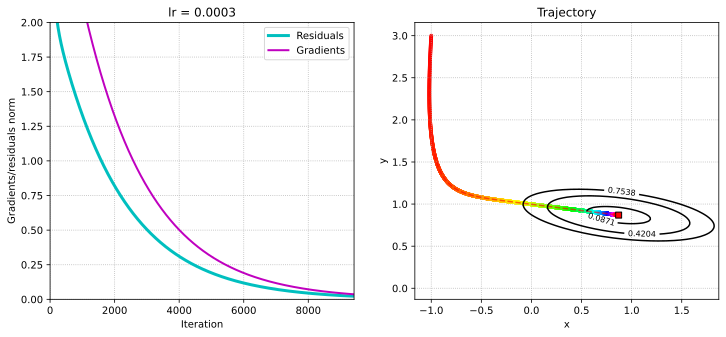

In [14]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
test_2d("gd", oracle, np.array([-1, 3.0]), lr=0.0003, tol=1e-6)

### Task 2.6 (0.5 points)

Apply gradient descent algorithm to simple linear regression trained on `boston` dataset. Take `lstat` as feature, `medv` as target. Provide some visualizations.

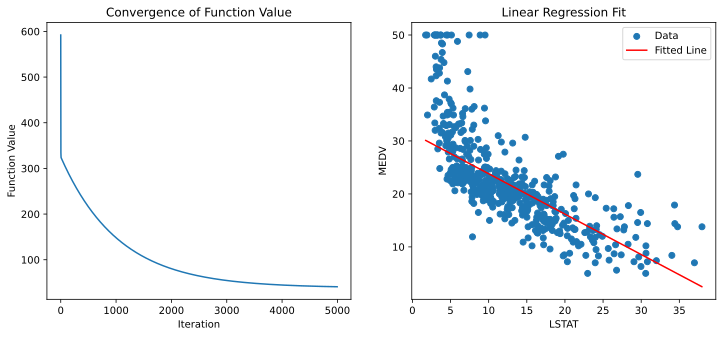

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
boston = pd.read_csv("/content/Boston.csv").drop("Unnamed: 0", axis=1)
# YOUR CODE HERE
X = boston['lstat'].values.reshape(-1, 1)
X = np.hstack((np.ones_like(X), X))
y = boston['medv'].values

oracle = LinRegOracle(X, y)

x_init = np.zeros(X.shape[1])
learning_rate = 1e-3

x_opt, message, history = gradient_descent(oracle, x_init, learning_rate, trace=True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['func'])
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Convergence of Function Value")

plt.subplot(1, 2, 2)
plt.scatter(boston['lstat'], boston['medv'], label="Data")
predicted_y = X @ x_opt
plt.plot(boston['lstat'], predicted_y, color="red", label="Fitted Line")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()


### GD for logistic regression

The targets must be from $\{-1, 1\}$. One more toy example:

success 525 iterations


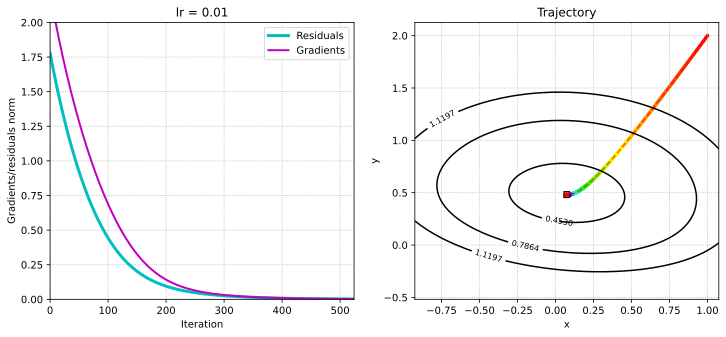

In [19]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)

### Task 2.7 (0.5 points)

Train simple logistic regression model on `breast_cancer` dataset using your gradient descent method. Take any feature from the dataset. Visualize the results.

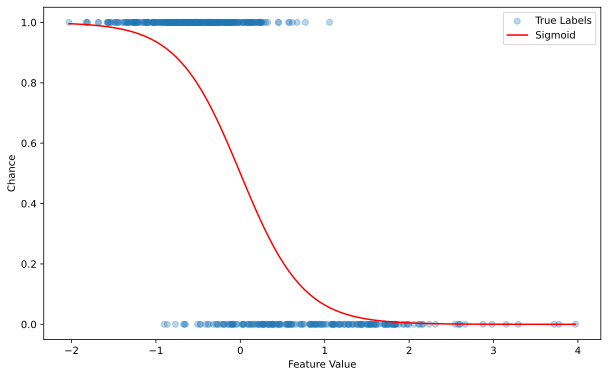

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
X = breast.data[:, [0]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
learning_rate = 1e-1
x_init = np.zeros(X.shape[1])

oracle = LogRegOracle(X, y, regcoef=0.01)
x_opt, message, history = gradient_descent(oracle, x_init, learning_rate, trace=True,)

x_vals = np.linspace(A.min(), A.max(), 100)
predictions = expit(x_opt * x_vals)

plt.figure(figsize=(10, 6))
plt.scatter(A, (b + 1) / 2, label="True Labels", alpha=0.3)
plt.plot(x_vals, predictions, label="Sigmoid", color="red")
plt.xlabel("Feature Value")
plt.ylabel("Chance")
plt.legend()
plt.show()

## Newton's method

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \big(\nabla^2 f(\boldsymbol x_k)\big)^{-1} \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.8 (1 point)

Complete the implementation of Newton's method.

In [104]:
import scipy

def newton(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=100, trace=False, display=False):
    """
    Newton's optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively. If the Hessian
        returned by the oracle is not positive-definite method stops with message="newton_direction_error"
    x_0 : np.array
        Starting point for optimization algorithm
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'newton_direction_error': in case of failure of solving linear system with Hessian matrix (e.g. non-invertible matrix).
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = newton(oracle, np.zeros(5), line_search_options={'method': 'Constant', 'c': 1.0})
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):
        grad_at_x_k = oracle.grad(x_k)
        hess_at_x_k = oracle.hess(x_k)

        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).seconds)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        if i >= max_iter:
            return x_k, 'iterations_exceeded', history

        if np.linalg.norm(grad_at_x_k) ** 2 <= tolerance * np.linalg.norm(grad_at_x_0) ** 2:
            return x_k, 'success', history

        x_k = x_k - learning_rate * np.linalg.solve(hess_at_x_k, grad_at_x_k)

### Task 2.9 (1 point)

Apply Newton's methods to the previous tasks:

* quadratic function
* simple linear regression trained on `boston` dataset
* simple logistic regression trained on `breast_cancer` dataset

Compare the number of iterations and time execution of GD and Newton methods in this examples. Visualize your results.

success 18 iterations


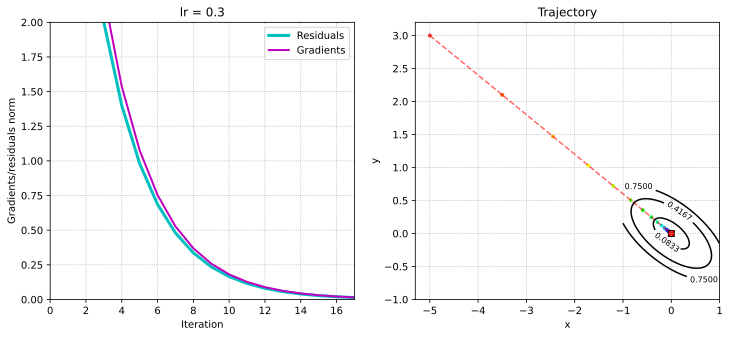

In [95]:
# YOUR CODE HERE
# quadratic function
import numpy as np

A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("newton", q_oracle, np.array([-5.0, 3.0]), lr=0.3)



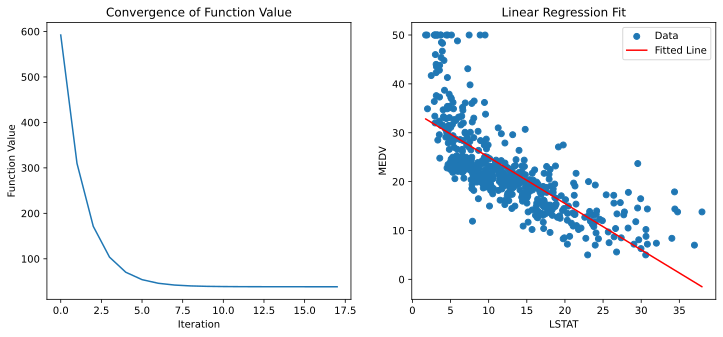

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
boston = pd.read_csv("/content/Boston.csv").drop("Unnamed: 0", axis=1)
# YOUR CODE HERE
# simple linear regression trained on boston dataset
X = boston['lstat'].values.reshape(-1, 1)
X = np.hstack((np.ones_like(X), X))
y = boston['medv'].values

oracle = LinRegOracle(X, y)

x_init = np.zeros(X.shape[1])
learning_rate = 0.3

x_opt, message, history = newton(oracle, x_init, learning_rate, trace=True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['func'])
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Convergence of Function Value")

plt.subplot(1, 2, 2)
plt.scatter(boston['lstat'], boston['medv'], label="Data")
predicted_y = X @ x_opt
plt.plot(boston['lstat'], predicted_y, color="red", label="Fitted Line")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()


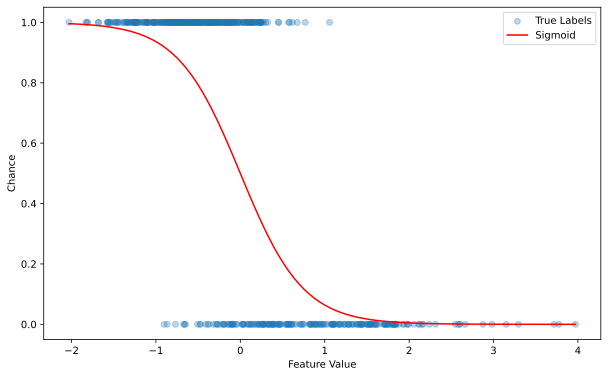

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
X = breast.data[:, [0]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
learning_rate = 1e-1
x_init = np.zeros(X.shape[1])

oracle = LogRegOracle(X, y, regcoef=0.01)
x_opt, message, history = newton(oracle, x_init, learning_rate, trace=True,)

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predictions = expit(x_opt[0] * x_vals)
plt.figure(figsize=(10, 6))
plt.scatter(X, (y + 1) / 2, label="True Labels", alpha=0.3)
plt.plot(x_vals, predictions, label="Sigmoid", color="red")
plt.xlabel("Feature Value")
plt.ylabel("Chance")
plt.legend()
plt.show()

## GD vs Newton

### Task 2.10 (1 point)

Run both gradient descent and Newton's methods on **full** `boston` and `breast_cancer` datasets. Do they converge? How many iterations are required for convergence? How much time? Justify your answers by numeric experiments and visualizations.

# Gradient descent methods on full boston dataset

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
boston = pd.read_csv("/content/Boston.csv").drop("Unnamed: 0", axis=1)
# YOUR CODE HERE
X = boston.drop(columns=['medv']).values
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = boston['medv'].values

oracle = LinRegOracle(X, y)

x_init = np.zeros(X.shape[1])
learning_rate = 1e-6

x_opt, message, history_gd_boston = gradient_descent(oracle, x_init, learning_rate, trace=True)
print(len(history_gd_boston['func']))
print(message)

778
success


# Gradient descent breast_cancer dataset

In [170]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
X = breast.data
scaler = StandardScaler()
X = scaler.fit_transform(X)
learning_rate = 1e-2
x_init = np.zeros(X.shape[1])

oracle = LogRegOracle(X, y, regcoef=0.1)
x_opt, message, history_gd_breast = gradient_descent(oracle, x_init, learning_rate, trace=True,)
print(len(history_gd_breast['func']))
print(message)

1537
success


# Newton's methods on full boston dataset

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
boston = pd.read_csv("/content/Boston.csv").drop("Unnamed: 0", axis=1)
# YOUR CODE HERE
X = boston.drop(columns=['medv']).values
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = boston['medv'].values

oracle = LinRegOracle(X, y)

x_init = np.zeros(X.shape[1])
learning_rate = 1e-1

x_opt, message, history_newton_boston = newton(oracle, x_init, learning_rate, trace=True)
print(len(history_newton_boston['func']))
print(message)

56
success


# Newton's methods on full breast_cancer dataset

In [172]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
X = breast.data
scaler = StandardScaler()
X = scaler.fit_transform(X)
learning_rate = 1e-1
x_init = np.zeros(X.shape[1])

oracle = LogRegOracle(X, y, regcoef=0.1)
x_opt, message, history_newton_breast = newton(oracle, x_init, learning_rate, trace=True,)
print(len(history_newton_breast['func']))
print(message)

57
success


###  Do they converge? Yes

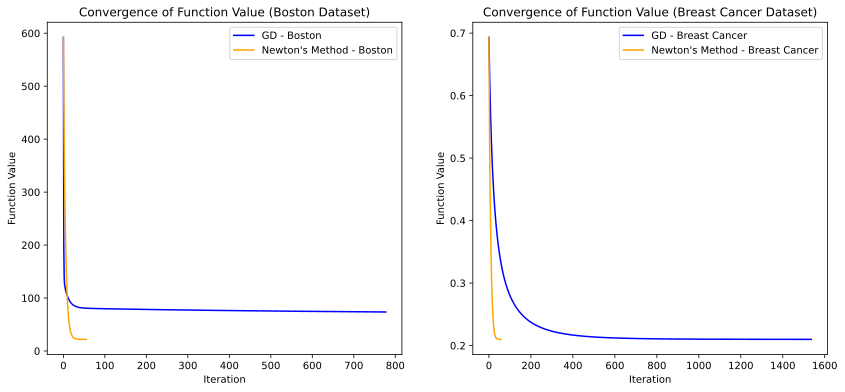

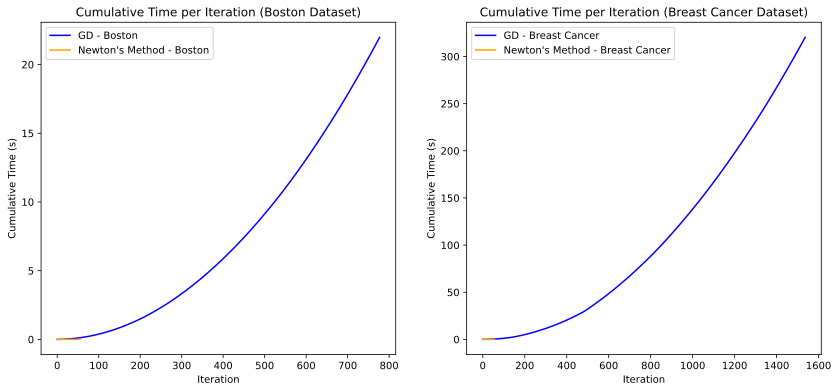

In [173]:
import matplotlib.pyplot as plt

# Plotting Function Value Convergence
plt.figure(figsize=(14, 6))

# Gradient Descent - Boston Dataset
plt.subplot(1, 2, 1)
plt.plot(range(len(history_gd_boston['func'])), history_gd_boston['func'], label="GD - Boston", color='blue')
plt.plot(range(len(history_newton_boston['func'])), history_newton_boston['func'], label="Newton's Method - Boston", color='orange')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.legend()
plt.title("Convergence of Function Value (Boston Dataset)")

# Gradient Descent - Breast Cancer Dataset
plt.subplot(1, 2, 2)
plt.plot(range(len(history_gd_breast['func'])), history_gd_breast['func'], label="GD - Breast Cancer", color='blue')
plt.plot(range(len(history_newton_breast['func'])), history_newton_breast['func'], label="Newton's Method - Breast Cancer", color='orange')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.legend()
plt.title("Convergence of Function Value (Breast Cancer Dataset)")

plt.show()

# Plotting Time Taken per Iteration
plt.figure(figsize=(14, 6))

# Cumulative time for GD and Newton's on Boston dataset
plt.subplot(1, 2, 1)
plt.plot(range(len(history_gd_boston['time'])), np.cumsum(history_gd_boston['time']), label="GD - Boston", color='blue')
plt.plot(range(len(history_newton_boston['time'])), np.cumsum(history_newton_boston['time']), label="Newton's Method - Boston", color='orange')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Time (s)")
plt.legend()
plt.title("Cumulative Time per Iteration (Boston Dataset)")

# Cumulative time for GD and Newton's on Breast Cancer dataset
plt.subplot(1, 2, 2)
plt.plot(range(len(history_gd_breast['time'])), np.cumsum(history_gd_breast['time']), label="GD - Breast Cancer", color='blue')
plt.plot(range(len(history_newton_breast['time'])), np.cumsum(history_newton_breast['time']), label="Newton's Method - Breast Cancer", color='orange')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Time (s)")
plt.legend()
plt.title("Cumulative Time per Iteration (Breast Cancer Dataset)")

plt.show()
